# Tableau - MakeoverMonday 2019 Week 37 

**From 1996 to 2019, how many people checked out the books of James Patterson at the Seattle Public Library?**

> *This project is based on the popular [#MakeoverMonday](https://twitter.com/hashtag/MakeoverMonday?src=hashtag_click&pf=on) data initiative run by Tableau Zen Master, [Andy Kriebel](http://www.makeovermonday.co.uk/), and [Eva Murray](https://trimydata.com/), Head of Business Intelligence at Exasol. Each week they provide an article that contains a data visualization and data set. Participants are able to look at the data set and see if they can come up with a better story, a different story by redesigning the chart using Tableau.*

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read csv data file into a pandas dataframe

df = pd.read_csv("Seattle Library James Patterson Book Checkouts.csv")

In [3]:
# Take a look at the first few rows

df.head()

,Material Type,Title,Series,Checkout Year,Checkout Month,Checkouts,Subjects,Publisher,Publication Year
0,BOOK,#1 Suspect,NaN,2019,8,1,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
1,BOOK,#1 Suspect,NaN,2019,6,1,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
2,BOOK,#1 Suspect,NaN,2019,6,2,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
3,BOOK,#1 Suspect,NaN,2019,5,1,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
4,BOOK,#1 Suspect,NaN,2019,5,2,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012


In [4]:
# How many rows are in this data frame?

len(df)

17918

In [5]:
# How many columns?

len(df.columns)

9

In [6]:
# What are the columns?

df.columns

Index(['Material Type', 'Title', 'Series', 'Checkout Year', 'Checkout Month',
       'Checkouts', 'Subjects', 'Publisher', 'Publication Year'],
      dtype='object')

In [7]:
# Take a look at Null Values

df.isnull().sum()

Material Type          0
Title                  0
Series              5379
Checkout Year          0
Checkout Month         0
Checkouts              0
Subjects               0
Publisher              0
Publication Year       0
dtype: int64

In [8]:
# Looking at the Series column before of Null values found in previous analysis

df['Series']
df['Series'].isnull()

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
17888    True
17889    True
17890    True
17891    True
17892    True
17893    True
17894    True
17895    True
17896    True
17897    True
17898    True
17899    True
17900    True
17901    True
17902    True
17903    True
17904    True
17905    True
17906    True
17907    True
17908    True
17909    True
17910    True
17911    True
17912    True
17913    True
17914    True
17915    True
17916    True
17917    True
Name: Series, Length: 17918, dtype: bool

In [9]:
# Making a list of missing value types

missing_values = ["n/a", "na", "--", "NaN"]
df = pd.read_csv("Seattle Library James Patterson Book Checkouts.csv", na_values = missing_values)

In [10]:
# Making sure all null values are accounted for, in case entry of null changes

df.isnull().sum()

Material Type          0
Title                  0
Series              5379
Checkout Year          0
Checkout Month         0
Checkouts              0
Subjects               0
Publisher              0
Publication Year       0
dtype: int64

In [11]:
# Also check data types and null values using the following

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 9 columns):
Material Type       17918 non-null object
Title               17918 non-null object
Series              12539 non-null object
Checkout Year       17918 non-null int64
Checkout Month      17918 non-null int64
Checkouts           17918 non-null int64
Subjects            17918 non-null object
Publisher           17918 non-null object
Publication Year    17918 non-null object
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


In [12]:
pub_arr = df['Publication Year'].unique()
pub_arr

array(['2012', '2016', '2011', '2013', '2015', '2017', '2001', '2007',
       '[2005], ©2004.', '2005', '2009', '2008', '2009, c2008.', '2006',
       '2019', '[2003]', '2018', '2012, c2011.', '[2012]', 'c2012.',
       '2014', '2002', 'c2005.', '[2000]', 'c2000.', '2010',
       '2008, c2007.', '2011, c2010.', '2011, ©2002.', 'c2011.', '[2017]',
       'c1996.', '[2018]', '[2019]', '[2011]', '2000', '2000, c1995.',
       '[2004]', '2005, ©2004.', 'c2004.', '[2009]', 'c2009.', '[2014]',
       '1999', '[2010]', 'c2010.', '[2006]', '2007, 2006.', '[2013]',
       'c2001.', 'C2016.', '2008, c2006.', '2011, ©2010.', '2007, c2005.',
       '2009, c2005.', 'c2002.', '[2004], c2003.', '2009, c2007.', '2003',
       '©2003.', '[2016]', '[2001]', '2010, c2001.', '[1998]', 'c1998.'],
      dtype=object)

In [13]:
len(pub_arr)

65

### 65 Unique Years!

The years were entered in various formats that included brackets and copyright symbols. We only want dates from 1996 to 2019, a total of 23 unique years. 

# Checkpoint #1 


A good strategy is to create checkpoints since the work done before this point have been working properly. You can refer back to various points to see where the codes have messed up.

Let's make a copy of df as df2. 

In [14]:
df2 = df

In [15]:
df2['Publication Year'].unique()

array(['2012', '2016', '2011', '2013', '2015', '2017', '2001', '2007',
       '[2005], ©2004.', '2005', '2009', '2008', '2009, c2008.', '2006',
       '2019', '[2003]', '2018', '2012, c2011.', '[2012]', 'c2012.',
       '2014', '2002', 'c2005.', '[2000]', 'c2000.', '2010',
       '2008, c2007.', '2011, c2010.', '2011, ©2002.', 'c2011.', '[2017]',
       'c1996.', '[2018]', '[2019]', '[2011]', '2000', '2000, c1995.',
       '[2004]', '2005, ©2004.', 'c2004.', '[2009]', 'c2009.', '[2014]',
       '1999', '[2010]', 'c2010.', '[2006]', '2007, 2006.', '[2013]',
       'c2001.', 'C2016.', '2008, c2006.', '2011, ©2010.', '2007, c2005.',
       '2009, c2005.', 'c2002.', '[2004], c2003.', '2009, c2007.', '2003',
       '©2003.', '[2016]', '[2001]', '2010, c2001.', '[1998]', 'c1998.'],
      dtype=object)

In [16]:
# Let's clean that up using the replace method! 

# Make a variable with characters to be replace/deleted
rep_chars = 'c|C|\]|\[|©|\.'

# Use a FOR Loop with .replace() along with rep_chars 
df2['Publication Year'] = df2['Publication Year'].str.replace(rep_chars,"")
    

In [17]:
# Check how many unique values are NOW in Publication Year

df2['Publication Year'].unique()

array(['2012', '2016', '2011', '2013', '2015', '2017', '2001', '2007',
       '2005, 2004', '2005', '2009', '2008', '2009, 2008', '2006', '2019',
       '2003', '2018', '2012, 2011', '2014', '2002', '2000', '2010',
       '2008, 2007', '2011, 2010', '2011, 2002', '1996', '2000, 1995',
       '2004', '1999', '2007, 2006', '2008, 2006', '2007, 2005',
       '2009, 2005', '2004, 2003', '2009, 2007', '2010, 2001', '1998'],
      dtype=object)

In [18]:
# Count the unique publication years 

count_years = len(df2['Publication Year'].unique())
count_years

37

### From 65 unique years we cut the number of years to 37, almost half!

So there's more work to be done in order to get to the 23 unique years that we want. And looking at the values inside the array we can see that some values come as pairs. Why is that? 

Let's see

In [19]:
# Group the numbers of books checked out by years

df2['Publication Year'].value_counts()

2012          1897
2011          1703
2009          1573
2010          1507
2014          1425
2013          1263
2016          1133
2015          1102
2008          1019
2007           972
2017           956
2001           468
2018           418
2006           398
2005           390
2004           234
2003           226
1999           191
2002           177
2000           113
1996            87
2019            87
2000, 1995      82
2011, 2010      78
2005, 2004      57
2009, 2005      50
2012, 2011      44
2009, 2007      43
2007, 2005      41
2007, 2006      40
2008, 2007      40
2010, 2001      21
2008, 2006      19
2004, 2003      18
1998            18
2009, 2008      17
2011, 2002      11
Name: Publication Year, dtype: int64

The reason for the paired values is that Mr Patterson's books must have been republished, possibly in a different format, an added foreword, etc, so the publishers can sell more of his books. 

For data analysis to work properly we will always want a single value in a single cell. So that's our next task: to break the pairs up and treat them as one values rather than two.

A choice has to be made here: do we include the checkouts in the year when the book was first published or use the latest publication year? 

Let's go for the latest published year.

In [20]:
# Split the pairs and add the checkouts to the latest published year 

df2['Publication Year'] = df2['Publication Year'].str.split(pat=',', expand=True) 

In [21]:
# Let's check the checkout numbers by years again

df2['Publication Year'].value_counts()

2012    1941
2011    1792
2009    1683
2010    1528
2014    1425
2013    1263
2016    1133
2015    1102
2008    1078
2007    1053
2017     956
2001     468
2005     447
2018     418
2006     398
2004     252
2003     226
2000     195
1999     191
2002     177
2019      87
1996      87
1998      18
Name: Publication Year, dtype: int64

In [22]:
# Let's also check whether we've gotten to our desired number of unique years

count_years2 = len(df2['Publication Year'].unique())
count_years2

23

# Checkpoint #2 - Let's make charts

In [23]:
df3 = df2

In [24]:
df3.head()

,Material Type,Title,Series,Checkout Year,Checkout Month,Checkouts,Subjects,Publisher,Publication Year
0,BOOK,#1 Suspect,NaN,2019,8,1,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
1,BOOK,#1 Suspect,NaN,2019,6,1,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
2,BOOK,#1 Suspect,NaN,2019,6,2,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
3,BOOK,#1 Suspect,NaN,2019,5,1,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012
4,BOOK,#1 Suspect,NaN,2019,5,2,"Private investigators California Fiction, Priv...","Little, Brown and Co.,",2012


In [25]:
# Count the number of rows

len(df3)

17918

### Great, no rows were harmed in our clean up!

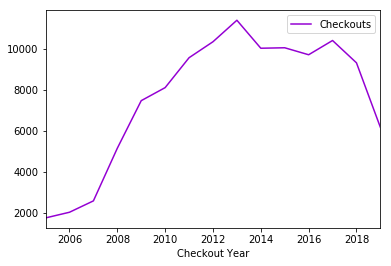

In [26]:
# Let's make a Bar Chart, in the color Teal of the number of check outs grouped by year.


df3.groupby('Checkout Year').Checkouts.sum().reset_index().plot('Checkout Year', 'Checkouts', color='darkviolet')



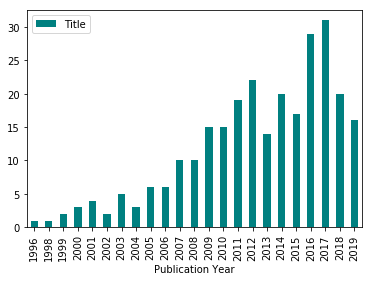

In [27]:
# Let's make a Bar Char of the number of Titles published each year.

df3.groupby('Publication Year').Title.nunique().reset_index().plot('Publication Year', 'Title', kind='bar', color='teal')

# Finally, let's export our newly cleaned data set in .csv format so we can import it into Tableau to make an amazing visualization!

In [28]:
df3.to_csv('MM2019w37_Clean.csv', index=False)